### Link to Tableau Dashboard

https://public.tableau.com/views/finalprojectdashboard_17102352479540/Dashboard1?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Tripleten final project EDA

### The purpose of this EDA is to provide financial overview, insights and future tools for AltiQ Hardware
### The data used is from September 2017 to December 2021, and so all the insights, assumptions and overview regard the data from that time peroid alone. 
### There are limitations to the data, for example there are data on only two categories of sold producets, so the insights provided will only regard the data that is provdied. 

## Key notes from the analysis

### Revenue and gross profit are increasing yearly. 2022 is the most succesful year yet. 
### Months October to February have the highest average revenue and profit, March to Septmber have low revenue and profit. December has the highest values while March has the lowest.
### APAC is the region with highest average revenue per customer, followed by NA. 
### Internal HDD is the highest sold category across all regions.
### Customers from NA buy in larger quantites when they buy via the E- Commerce platform



In [2]:
con = sqlite3.connect('atliq_db.sqlite3')

In [3]:
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('dim_customer',), ('dim_product',), ('fact_pre_discount',), ('fact_manufacturing_cost',), ('fact_gross_price',), ('fact_sales_monthly',)]


## Revenue (Monthly and yearly)
I will start with a general outlook on the revenue of the business, grouped by month and then by year.

In [4]:
query = '''
SELECT 
    fact_sales_monthly.date as date,
    fact_sales_monthly.product_code as product_code,
    fact_sales_monthly.sold_quantity as sold_quantity,
    fact_pre_discount.pre_invoice_discount_pct as discount_percent,
    fact_sales_monthly.fiscal_year as year,
    fact_gross_price.gross_price as gross_price
FROM fact_sales_monthly
    INNER JOIN fact_gross_price on fact_gross_price.product_code = fact_sales_monthly.product_code 
    INNER JOIN fact_pre_discount on fact_sales_monthly.customer_code = fact_pre_discount.customer_code
GROUP BY fact_sales_monthly.customer_code, date, fact_sales_monthly.product_code
'''

In [5]:
revenue_df=pd.read_sql_query(query, con)
revenue_df['date'] = pd.to_datetime(revenue_df['date'])
revenue_df.info()
display(revenue_df.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67250 entries, 0 to 67249
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              67250 non-null  datetime64[ns]
 1   product_code      67250 non-null  object        
 2   sold_quantity     67250 non-null  int64         
 3   discount_percent  67250 non-null  float64       
 4   year              67250 non-null  int64         
 5   gross_price       67250 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 3.1+ MB


,date,product_code,sold_quantity,discount_percent,year,gross_price
0,2017-09-01,A0118150101,51,0.0703,2018,14.4392
1,2017-09-01,A0118150102,77,0.0703,2018,18.5595
2,2017-09-01,A0118150103,54,0.0703,2018,19.3442
3,2017-09-01,A0118150104,42,0.0703,2018,18.5072
4,2017-09-01,A0418150101,67,0.0703,2018,14.0555
5,2017-09-01,A0418150102,17,0.0703,2018,15.9880
6,2017-09-01,A0418150103,25,0.0703,2018,15.9345
7,2017-09-01,A0418150104,17,0.0703,2018,17.5027
8,2017-10-01,A0118150101,54,0.0703,2018,14.4392
9,2017-10-01,A0118150102,37,0.0703,2018,18.5595


In [6]:
revenue_df['disc_price'] = (1 - revenue_df['discount_percent'])*(revenue_df['gross_price'])
revenue_df['revenue'] = revenue_df['sold_quantity'] * revenue_df['disc_price']
revenue_df

,date,product_code,sold_quantity,discount_percent,year,gross_price,disc_price,revenue
0,2017-09-01,A0118150101,51,0.0703,2018,14.4392,13.424124,684.630336
1,2017-09-01,A0118150102,77,0.0703,2018,18.5595,17.254767,1328.617071
2,2017-09-01,A0118150103,54,0.0703,2018,19.3442,17.984303,971.152348
3,2017-09-01,A0118150104,42,0.0703,2018,18.5072,17.206144,722.658041
4,2017-09-01,A0418150101,67,0.0703,2018,14.0555,13.067398,875.515689
...,...,...,...,...,...,...,...,...
67245,2021-12-01,A0220150203,23,0.2248,2022,23.6154,18.306658,421.053136
67246,2021-12-01,A0320150301,30,0.2248,2022,22.2856,17.275797,518.273914
67247,2021-12-01,A0321150302,10,0.2248,2022,27.1027,21.010013,210.100130
67248,2021-12-01,A0321150303,44,0.2248,2022,28.0059,21.710174,955.247642


In [7]:
display(revenue_df.duplicated().sum())
display(revenue_df[revenue_df.duplicated()== True])

197

,date,product_code,sold_quantity,discount_percent,year,gross_price,disc_price,revenue
5195,2020-03-01,A0118150104,2,0.0552,2020,18.5072,17.485603,34.971205
5200,2020-03-01,A0418150102,2,0.0552,2020,15.9880,15.105462,30.210925
5213,2020-05-01,A0118150102,4,0.0552,2020,18.5595,17.535016,70.140062
5231,2020-07-01,A0418150101,10,0.0552,2020,14.0555,13.279636,132.796364
5250,2020-09-01,A0219150202,24,0.0552,2021,20.8223,19.672909,472.149817
...,...,...,...,...,...,...,...,...
66673,2020-01-01,A0118150101,15,0.2282,2020,14.4392,11.144175,167.162618
66721,2020-06-01,A0219150201,4,0.2282,2020,18.4663,14.252290,57.009161
66746,2020-09-01,A0320150301,3,0.2282,2021,22.2856,17.200026,51.600078
66805,2021-05-01,A0118150101,7,0.2282,2021,14.4392,11.144175,78.009222


In [8]:
revenue_df = revenue_df.drop_duplicates()
revenue_df['product_code'].value_counts()

product_code
A0118150104    6629
A0118150103    6617
A0418150103    6574
A0118150101    5988
A0118150102    5987
A0219150202    5732
A0219150201    5727
A0320150301    4304
A0220150203    4303
A0418150102    4081
A0418150101    4077
A0321150302    2504
A0321150303    2502
A0418150104    2028
Name: count, dtype: int64

In [74]:
revenue_df.to_csv('revenue_df.csv',index = False)

In [77]:
revenue = revenue_df.groupby(['date','year'])['revenue'].sum().reset_index()
revenue.head(15)

,date,year,revenue
0,2017-09-01,2018,153659.189137
1,2017-10-01,2018,201842.945862
2,2017-11-01,2018,283747.260167
3,2017-12-01,2018,290494.050639
4,2018-01-01,2018,157709.703889
5,2018-02-01,2018,158815.830234
6,2018-03-01,2018,169509.411482
7,2018-04-01,2018,165504.996260
8,2018-05-01,2018,158964.876099
9,2018-06-01,2018,162566.763554


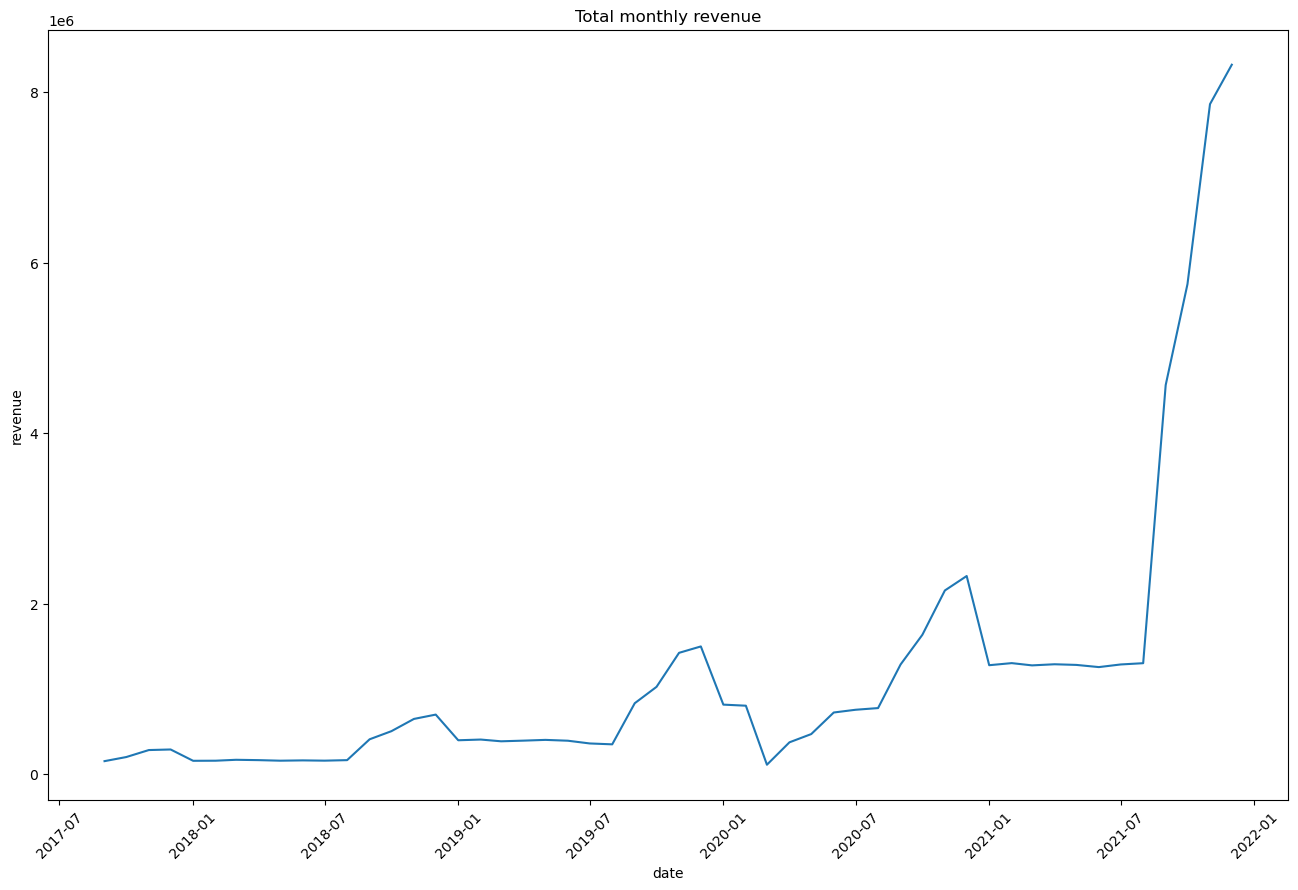

In [10]:
plt.figure(figsize =(16,10))
sns.lineplot(data = revenue, x = 'date', y = 'revenue').set(title = 'Total monthly revenue')
plt.xticks(rotation=45)
plt.show()

There a general peaks of revenue increase between july to december in all years, afterwhich it seems that revenue is dropping and stays steady until the next july. However, there's major, extreme increase in revenue that starts in July 2021 and ends at the end of our database on January 2022.

In [11]:
yearly_revenue = revenue.groupby('year')['revenue'].sum().reset_index()
yearly_revenue

,year,revenue
0,2018,2.227679e+06
1,2019,5.358001e+06
2,2020,9.615385e+06
3,2021,1.768152e+07
4,2022,2.649452e+07


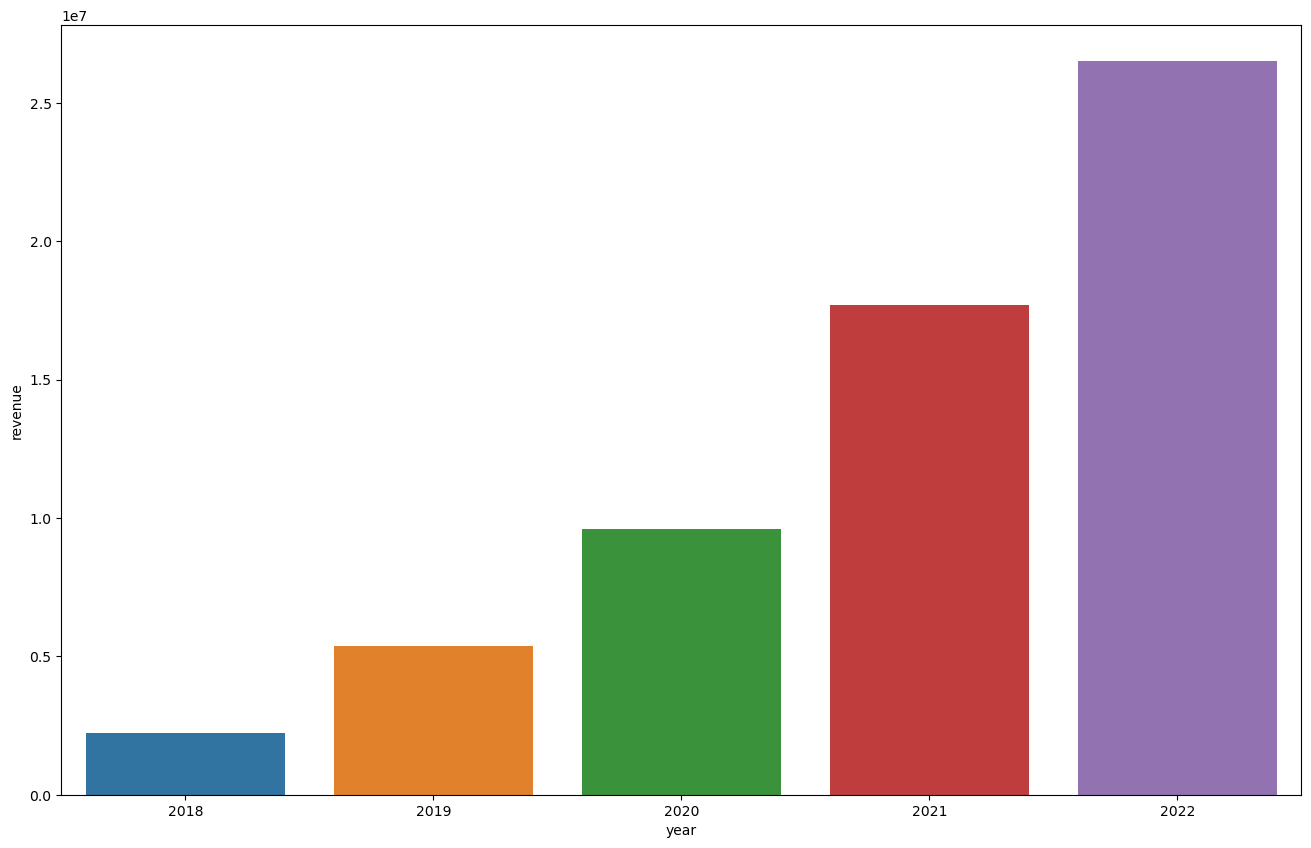

In [12]:
plt.figure(figsize =(16,10))
sns.barplot(data = yearly_revenue, x = 'year', y = 'revenue')
plt.show()

In [13]:
revenue[revenue['year']==2022]

,date,year,revenue
48,2021-09-01,2022,4.564729e+06
49,2021-10-01,2022,5.748714e+06
50,2021-11-01,2022,7.859418e+06
51,2021-12-01,2022,8.321661e+06


We can see that the revenue increases as the years go. It's important to note the fiscal year in our data is from September to August. 2022 has the least revenue because it only has 4 months of data. However, in only 4 months the revenue in 2022 far surpasses the previous year.     

In [14]:
revenue['month'] = revenue['date'].dt.month
revenue.head(10)

,date,year,revenue,month
0,2017-09-01,2018,153659.189137,9
1,2017-10-01,2018,201842.945862,10
2,2017-11-01,2018,283747.260167,11
3,2017-12-01,2018,290494.050639,12
4,2018-01-01,2018,157709.703889,1
5,2018-02-01,2018,158815.830234,2
6,2018-03-01,2018,169509.411482,3
7,2018-04-01,2018,165504.996260,4
8,2018-05-01,2018,158964.876099,5
9,2018-06-01,2018,162566.763554,6


In [15]:
avg_month = revenue[revenue['year']!= 2022].groupby('month')['revenue'].mean().reset_index()
avg_month

,month,revenue
0,1,6.629477e+05
1,2,6.682452e+05
2,3,4.861295e+05
3,4,5.560310e+05
4,5,5.788827e+05
5,6,6.341821e+05
6,7,6.411081e+05
7,8,6.487004e+05
8,9,6.709953e+05
9,10,8.419033e+05


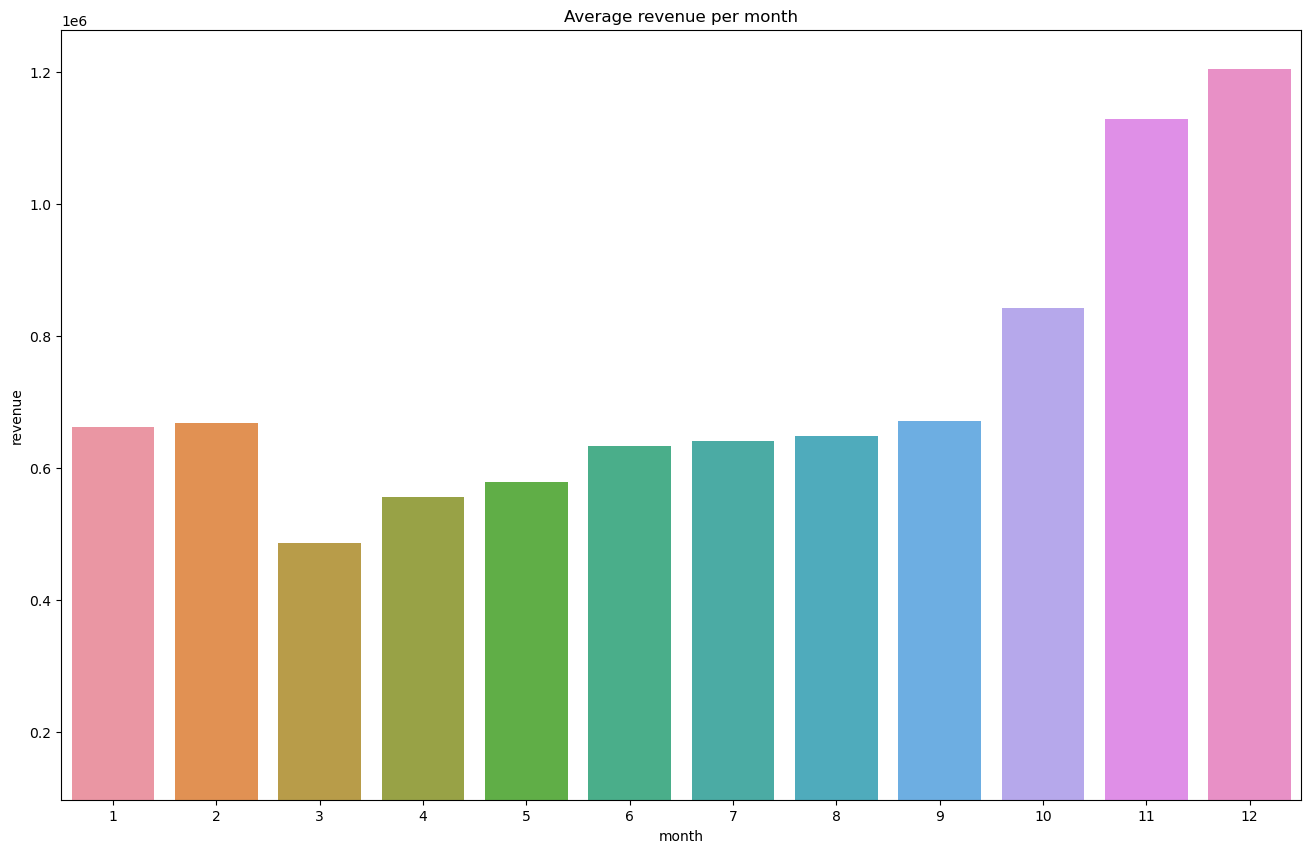

In [16]:
plt.figure(figsize =(16,10))
sns.barplot(data = avg_month, x = 'month', y = 'revenue').set(title = 'Average revenue per month')
plt.ylim(98000,)
plt.show()

To determine the average monthly revenue I removed 2022 values from that calcualtions, as they were extreme values that didn't represet previous years of the same months. As far as revenue goes, we can see that revnue comes down in the spring/summer months and is general higher from september the february. December has the highest average revenue. However, to truely understand the financial condition of the company we should take expenses into account. That's why the following step in the analysis will be gross profit.  

## Gross profit

In [17]:
query = '''
SELECT 
    fact_sales_monthly.date as date,
    fact_sales_monthly.product_code as product_code,
    fact_sales_monthly.sold_quantity as sold_quantity,
    fact_pre_discount.pre_invoice_discount_pct as discount_percent,
    fact_sales_monthly.fiscal_year as year,
    fact_gross_price.gross_price as gross_price,
    fact_manufacturing_cost.manufacturing_cost as manufactoring_cost
FROM fact_sales_monthly
    INNER JOIN fact_gross_price on fact_gross_price.product_code = fact_sales_monthly.product_code 
    INNER JOIN fact_pre_discount on fact_sales_monthly.customer_code = fact_pre_discount.customer_code
    INNER JOIN fact_manufacturing_cost ON fact_manufacturing_cost.product_code = fact_sales_monthly.product_code
GROUP BY fact_sales_monthly.customer_code, date, fact_sales_monthly.product_code
'''


In [18]:
product_profit_df=pd.read_sql_query(query, con)
product_profit_df['date'] = pd.to_datetime(product_profit_df['date'])
product_profit_df.info()
display(product_profit_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67250 entries, 0 to 67249
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                67250 non-null  datetime64[ns]
 1   product_code        67250 non-null  object        
 2   sold_quantity       67250 non-null  int64         
 3   discount_percent    67250 non-null  float64       
 4   year                67250 non-null  int64         
 5   gross_price         67250 non-null  float64       
 6   manufactoring_cost  67250 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 3.6+ MB


,date,product_code,sold_quantity,discount_percent,year,gross_price,manufactoring_cost
0,2017-09-01,A0118150101,51,0.0703,2018,14.4392,4.2033
1,2017-09-01,A0118150102,77,0.0703,2018,18.5595,5.3235
2,2017-09-01,A0118150103,54,0.0703,2018,19.3442,5.5306
3,2017-09-01,A0118150104,42,0.0703,2018,18.5072,5.4242
4,2017-09-01,A0418150101,67,0.0703,2018,14.0555,4.3896
...,...,...,...,...,...,...,...
67245,2021-12-01,A0220150203,23,0.2248,2022,23.6154,7.0621
67246,2021-12-01,A0320150301,30,0.2248,2022,22.2856,6.8414
67247,2021-12-01,A0321150302,10,0.2248,2022,27.1027,7.8161
67248,2021-12-01,A0321150303,44,0.2248,2022,28.0059,8.4291


In [19]:
product_profit_df['product_profit'] = (product_profit_df['gross_price'] - product_profit_df['manufactoring_cost'])*(1-product_profit_df['discount_percent'])
product_profit_df['gross_profit'] = product_profit_df['product_profit']*product_profit_df['sold_quantity']
product_profit_df

,date,product_code,sold_quantity,discount_percent,year,gross_price,manufactoring_cost,product_profit,gross_profit
0,2017-09-01,A0118150101,51,0.0703,2018,14.4392,4.2033,9.516316,485.332128
1,2017-09-01,A0118150102,77,0.0703,2018,18.5595,5.3235,12.305509,947.524208
2,2017-09-01,A0118150103,54,0.0703,2018,19.3442,5.5306,12.842504,693.495212
3,2017-09-01,A0118150104,42,0.0703,2018,18.5072,5.4242,12.163265,510.857134
4,2017-09-01,A0418150101,67,0.0703,2018,14.0555,4.3896,8.986387,602.087944
...,...,...,...,...,...,...,...,...,...
67245,2021-12-01,A0220150203,23,0.2248,2022,23.6154,7.0621,12.832118,295.138718
67246,2021-12-01,A0320150301,30,0.2248,2022,22.2856,6.8414,11.972344,359.170315
67247,2021-12-01,A0321150302,10,0.2248,2022,27.1027,7.8161,14.950972,149.509723
67248,2021-12-01,A0321150303,44,0.2248,2022,28.0059,8.4291,15.175935,667.741156


In [20]:
display(product_profit_df.duplicated().sum())
display(product_profit_df[product_profit_df.duplicated()== True])

197

,date,product_code,sold_quantity,discount_percent,year,gross_price,manufactoring_cost,product_profit,gross_profit
5195,2020-03-01,A0118150104,2,0.0552,2020,18.5072,5.4242,12.360818,24.721637
5200,2020-03-01,A0418150102,2,0.0552,2020,15.9880,4.6576,10.704962,21.409924
5213,2020-05-01,A0118150102,4,0.0552,2020,18.5595,5.3235,12.505373,50.021491
5231,2020-07-01,A0418150101,10,0.0552,2020,14.0555,4.3896,9.132342,91.323423
5250,2020-09-01,A0219150202,24,0.0552,2021,20.8223,6.2366,13.780569,330.733665
...,...,...,...,...,...,...,...,...,...
66673,2020-01-01,A0118150101,15,0.2282,2020,14.4392,4.2033,7.900068,118.501014
66721,2020-06-01,A0219150201,4,0.2282,2020,18.4663,5.7250,9.833735,39.334941
66746,2020-09-01,A0320150301,3,0.2282,2021,22.2856,6.8414,11.919834,35.759501
66805,2021-05-01,A0118150101,7,0.2282,2021,14.4392,4.2033,7.900068,55.300473


In [21]:
product_profit_df = product_profit_df.drop_duplicates()
product_profit_df

,date,product_code,sold_quantity,discount_percent,year,gross_price,manufactoring_cost,product_profit,gross_profit
0,2017-09-01,A0118150101,51,0.0703,2018,14.4392,4.2033,9.516316,485.332128
1,2017-09-01,A0118150102,77,0.0703,2018,18.5595,5.3235,12.305509,947.524208
2,2017-09-01,A0118150103,54,0.0703,2018,19.3442,5.5306,12.842504,693.495212
3,2017-09-01,A0118150104,42,0.0703,2018,18.5072,5.4242,12.163265,510.857134
4,2017-09-01,A0418150101,67,0.0703,2018,14.0555,4.3896,8.986387,602.087944
...,...,...,...,...,...,...,...,...,...
67245,2021-12-01,A0220150203,23,0.2248,2022,23.6154,7.0621,12.832118,295.138718
67246,2021-12-01,A0320150301,30,0.2248,2022,22.2856,6.8414,11.972344,359.170315
67247,2021-12-01,A0321150302,10,0.2248,2022,27.1027,7.8161,14.950972,149.509723
67248,2021-12-01,A0321150303,44,0.2248,2022,28.0059,8.4291,15.175935,667.741156


In [75]:
product_profit_df.to_csv('product_profit_df.csv', index = False)

In [22]:
gross_profit = product_profit_df.groupby(['date','year'])['gross_profit'].sum().reset_index()
gross_profit

,date,year,gross_profit
0,2017-09-01,2018,1.082298e+05
1,2017-10-01,2018,1.420441e+05
2,2017-11-01,2018,1.997280e+05
3,2017-12-01,2018,2.045836e+05
4,2018-01-01,2018,1.110549e+05
5,2018-02-01,2018,1.118049e+05
6,2018-03-01,2018,1.193287e+05
7,2018-04-01,2018,1.165338e+05
8,2018-05-01,2018,1.119384e+05
9,2018-06-01,2018,1.144146e+05


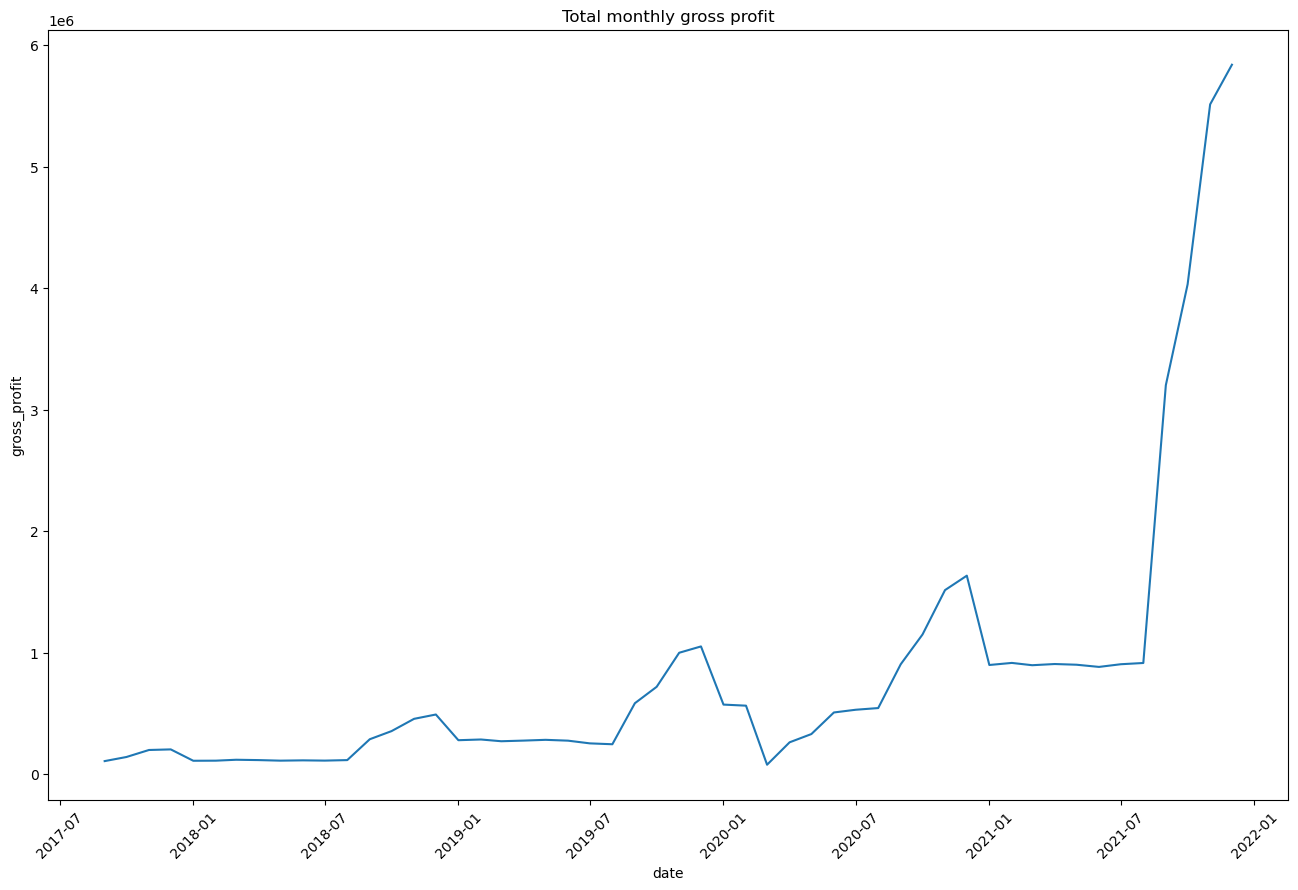

In [23]:
plt.figure(figsize =(16,10))
sns.lineplot(data = gross_profit, x = 'date', y = 'gross_profit').set(title = 'Total monthly gross profit')
plt.xticks(rotation=45)
plt.show()

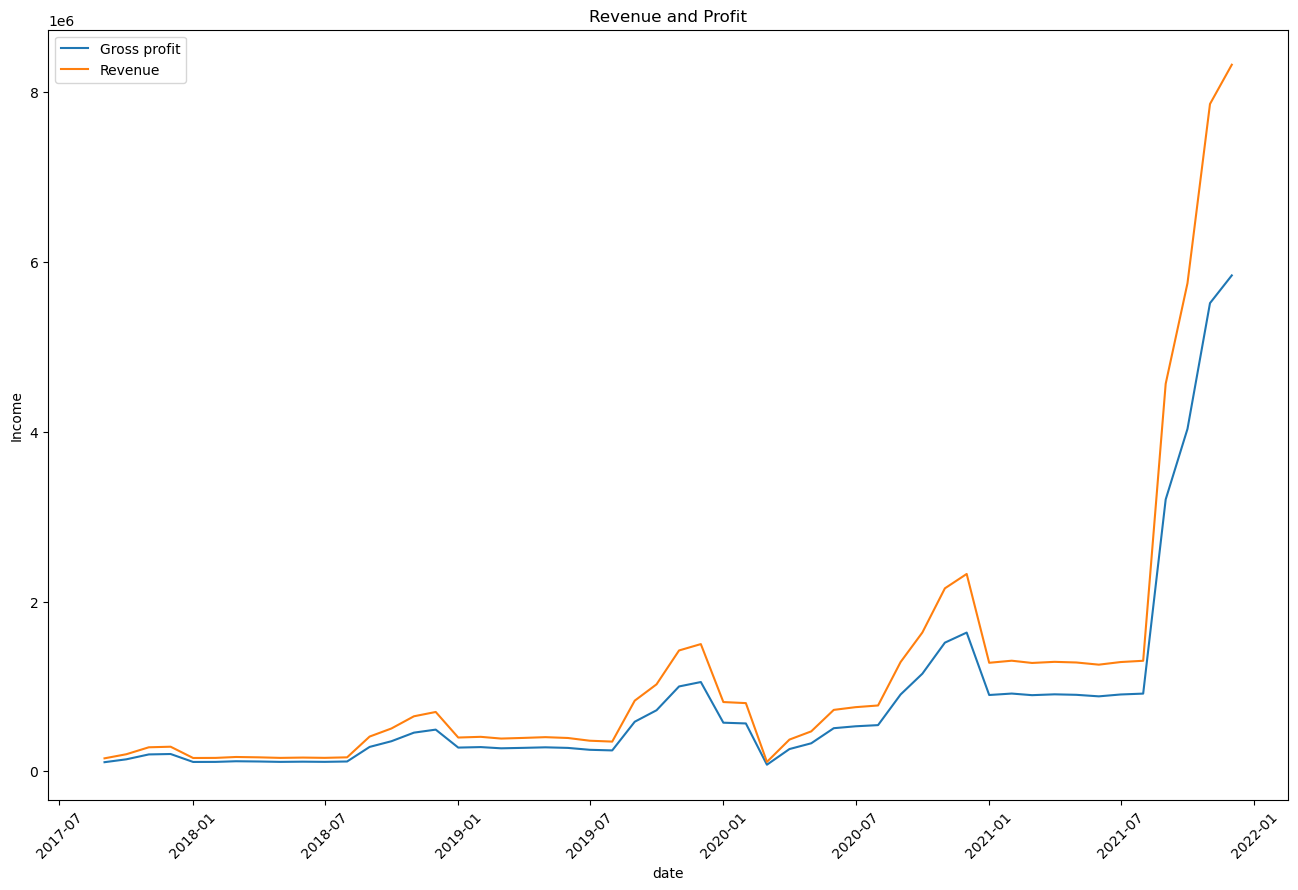

In [24]:
plt.figure(figsize =(16,10))
sns.lineplot(data = gross_profit, x = 'date', y = 'gross_profit',label = 'Gross profit')
sns.lineplot(data = revenue, x = 'date', y = 'revenue', label = 'Revenue')
plt.title('Revenue and Profit')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

In [25]:
delta_ratio = revenue['revenue']/gross_profit['gross_profit']
delta_ratio.describe()

count    52.000000
mean      1.422398
std       0.001628
min       1.419594
25%       1.420955
50%       1.422258
75%       1.424000
max       1.425385
dtype: float64

Since our measure of profit is based strictly on sales minous production costs, we can see that the revenue and gross profit distribution is very similar, with the difference being that gross profit is lower than revenue, but we can also see that the ratio between them is very stable and doesn't vary almost at all. 

In [26]:
yearly_profit = gross_profit.groupby('year')['gross_profit'].sum().reset_index()
yearly_profit

,year,gross_profit
0,2018,1.568428e+06
1,2019,3.767488e+06
2,2020,6.751389e+06
3,2021,1.243383e+07
4,2022,1.859048e+07


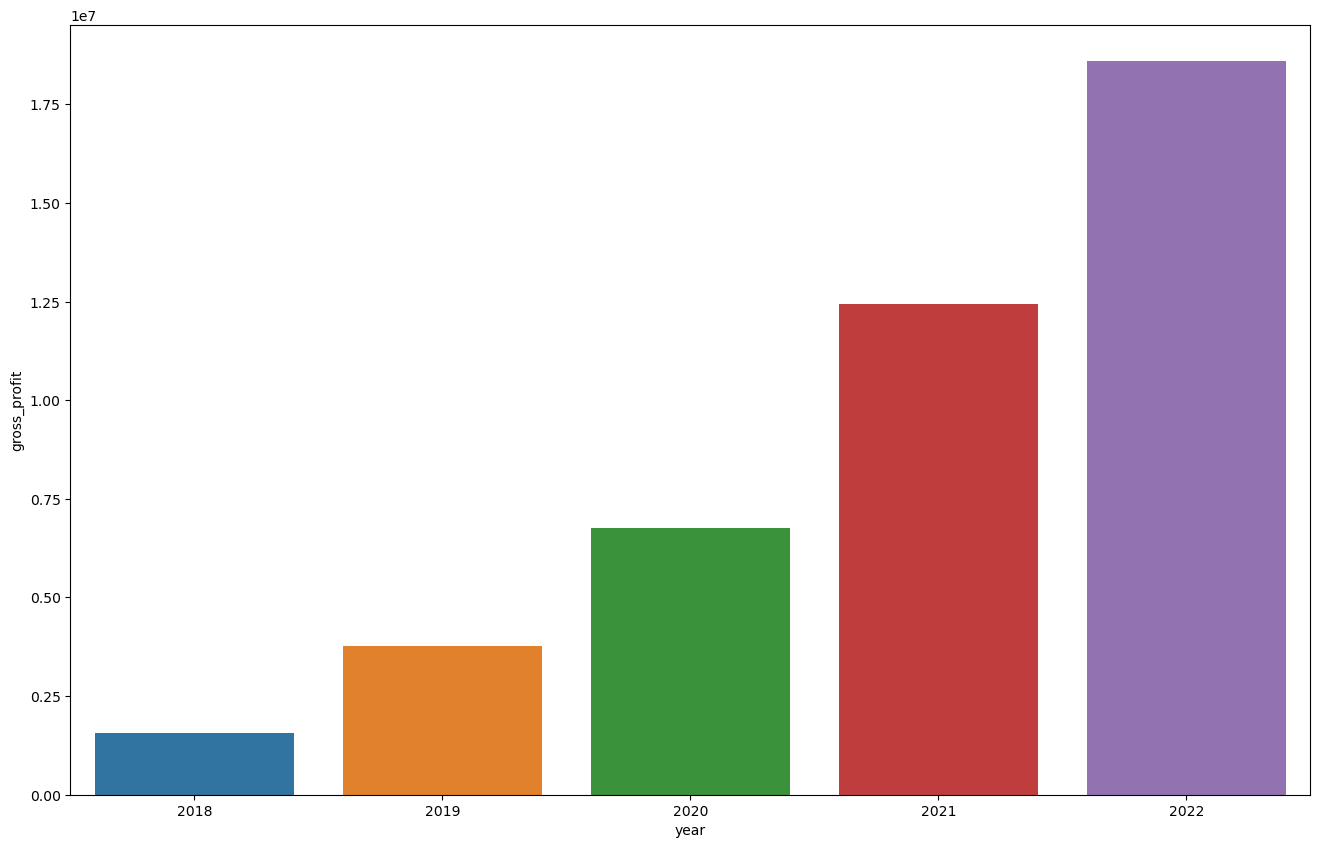

In [27]:
plt.figure(figsize =(16,10))
sns.barplot(data = yearly_profit, x = 'year', y = 'gross_profit')
plt.show()

As with the revenue values, 2022 far exceeds previous years in profit even though it only contains data from September to January. 

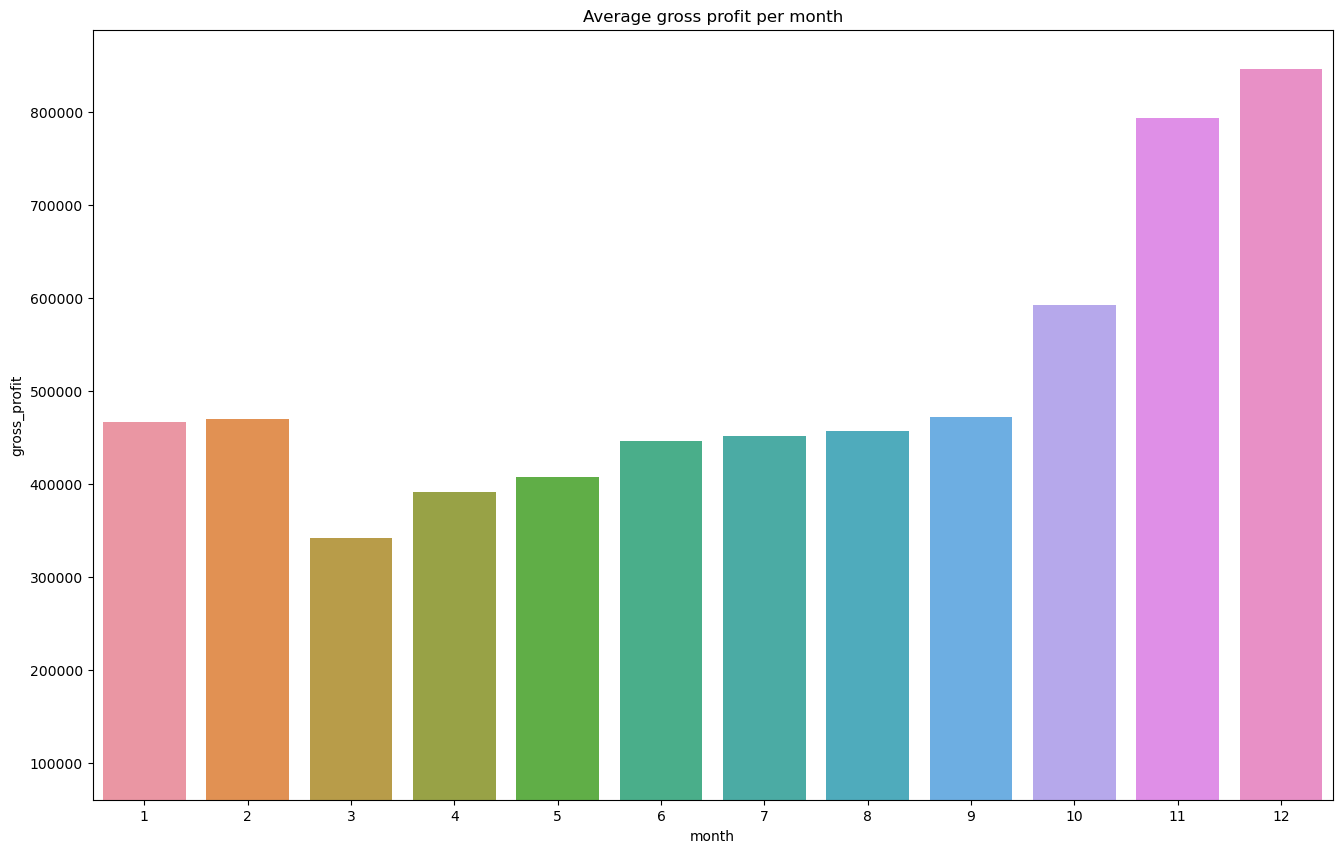

In [28]:
gross_profit['month'] = gross_profit['date'].dt.month
avg_month = gross_profit[gross_profit['year']!=2022].groupby('month')['gross_profit'].mean().reset_index()
plt.figure(figsize =(16,10))
sns.barplot(data = avg_month, x = 'month', y = 'gross_profit').set(title = 'Average gross profit per month')
plt.ylim(60000)
plt.show()

I excluded the 2022 data from this analysis as well. As before, the average gross profit per month is very similar to that of the revenue, just lower because of the production costs. The most profitable month on average is December, the least profitable is March. It might be worth checking into what is happening between march to august, to boost sales. Prehaps look into different types of marketing. 

## Average customer analysis

In [29]:
query = '''
SELECT 
    dim_customer.region as region,
    dim_customer.customer as customer,
    fact_sales_monthly.date as date,
    fact_sales_monthly.product_code as product_code,
    fact_sales_monthly.sold_quantity as sold_quantity,
    fact_pre_discount.pre_invoice_discount_pct as discount_percent,
    fact_sales_monthly.fiscal_year as year,
    fact_gross_price.gross_price as gross_price   
FROM fact_sales_monthly
    INNER JOIN dim_customer on dim_customer.customer_code = fact_sales_monthly.customer_code
    INNER JOIN fact_gross_price on fact_gross_price.product_code = fact_sales_monthly.product_code 
    INNER JOIN fact_pre_discount on fact_sales_monthly.customer_code = fact_pre_discount.customer_code
    
GROUP BY region, customer, fact_sales_monthly.customer_code, date, fact_sales_monthly.product_code
'''


In [30]:
customer_df=pd.read_sql_query(query, con)
customer_df['date'] = pd.to_datetime(customer_df['date'])
customer_df.info()
display(customer_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67250 entries, 0 to 67249
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   region            67250 non-null  object        
 1   customer          67250 non-null  object        
 2   date              67250 non-null  datetime64[ns]
 3   product_code      67250 non-null  object        
 4   sold_quantity     67250 non-null  int64         
 5   discount_percent  67250 non-null  float64       
 6   year              67250 non-null  int64         
 7   gross_price       67250 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 4.1+ MB


,region,customer,date,product_code,sold_quantity,discount_percent,year,gross_price
0,APAC,Acclaimed Stores,2017-09-01,A0118150101,15,0.2193,2018,14.4392
1,APAC,Acclaimed Stores,2017-09-01,A0118150102,16,0.2193,2018,18.5595
2,APAC,Acclaimed Stores,2017-09-01,A0118150103,15,0.2193,2018,19.3442
3,APAC,Acclaimed Stores,2017-09-01,A0118150104,13,0.2193,2018,18.5072
4,APAC,Acclaimed Stores,2017-09-01,A0418150101,9,0.2193,2018,14.0555
...,...,...,...,...,...,...,...,...
67245,NA,walmart,2021-12-01,A0220150203,95,0.2063,2022,23.6154
67246,NA,walmart,2021-12-01,A0320150301,105,0.2063,2022,22.2856
67247,NA,walmart,2021-12-01,A0321150302,148,0.2063,2022,27.1027
67248,NA,walmart,2021-12-01,A0321150303,287,0.2063,2022,28.0059


In [31]:
customer_df['disc_price'] = (1 - customer_df['discount_percent'])*(customer_df['gross_price'])
customer_df['revenue'] = customer_df['sold_quantity'] * customer_df['disc_price']
customer_df

,region,customer,date,product_code,sold_quantity,discount_percent,year,gross_price,disc_price,revenue
0,APAC,Acclaimed Stores,2017-09-01,A0118150101,15,0.2193,2018,14.4392,11.272683,169.090252
1,APAC,Acclaimed Stores,2017-09-01,A0118150102,16,0.2193,2018,18.5595,14.489402,231.830426
2,APAC,Acclaimed Stores,2017-09-01,A0118150103,15,0.2193,2018,19.3442,15.102017,226.530254
3,APAC,Acclaimed Stores,2017-09-01,A0118150104,13,0.2193,2018,18.5072,14.448571,187.831424
4,APAC,Acclaimed Stores,2017-09-01,A0418150101,9,0.2193,2018,14.0555,10.973129,98.758160
...,...,...,...,...,...,...,...,...,...,...
67245,NA,walmart,2021-12-01,A0220150203,95,0.2063,2022,23.6154,18.743543,1780.636583
67246,NA,walmart,2021-12-01,A0320150301,105,0.2063,2022,22.2856,17.688081,1857.248476
67247,NA,walmart,2021-12-01,A0321150302,148,0.2063,2022,27.1027,21.511413,3183.689123
67248,NA,walmart,2021-12-01,A0321150303,287,0.2063,2022,28.0059,22.228283,6379.517172


In [32]:
display(customer_df.duplicated().sum())
display(customer_df[customer_df.duplicated()==True])

5

,region,customer,date,product_code,sold_quantity,discount_percent,year,gross_price,disc_price,revenue
6711,APAC,Atliq Exclusive,2020-03-01,A0118150104,2,0.0552,2020,18.5072,17.485603,34.971205
6716,APAC,Atliq Exclusive,2020-03-01,A0418150102,2,0.0552,2020,15.9880,15.105462,30.210925
6729,APAC,Atliq Exclusive,2020-05-01,A0118150102,4,0.0552,2020,18.5595,17.535016,70.140062
6747,APAC,Atliq Exclusive,2020-07-01,A0418150101,10,0.0552,2020,14.0555,13.279636,132.796364
6766,APAC,Atliq Exclusive,2020-09-01,A0219150202,24,0.0552,2021,20.8223,19.672909,472.149817


In [33]:
customer_df = customer_df.drop_duplicates().reset_index()
customer_df

,index,region,customer,date,product_code,sold_quantity,discount_percent,year,gross_price,disc_price,revenue
0,0,APAC,Acclaimed Stores,2017-09-01,A0118150101,15,0.2193,2018,14.4392,11.272683,169.090252
1,1,APAC,Acclaimed Stores,2017-09-01,A0118150102,16,0.2193,2018,18.5595,14.489402,231.830426
2,2,APAC,Acclaimed Stores,2017-09-01,A0118150103,15,0.2193,2018,19.3442,15.102017,226.530254
3,3,APAC,Acclaimed Stores,2017-09-01,A0118150104,13,0.2193,2018,18.5072,14.448571,187.831424
4,4,APAC,Acclaimed Stores,2017-09-01,A0418150101,9,0.2193,2018,14.0555,10.973129,98.758160
...,...,...,...,...,...,...,...,...,...,...,...
67240,67245,NA,walmart,2021-12-01,A0220150203,95,0.2063,2022,23.6154,18.743543,1780.636583
67241,67246,NA,walmart,2021-12-01,A0320150301,105,0.2063,2022,22.2856,17.688081,1857.248476
67242,67247,NA,walmart,2021-12-01,A0321150302,148,0.2063,2022,27.1027,21.511413,3183.689123
67243,67248,NA,walmart,2021-12-01,A0321150303,287,0.2063,2022,28.0059,22.228283,6379.517172


In [34]:
display(customer_df[customer_df['customer']=='Amazon '])
display(customer_df[customer_df['customer']=='Amazon'])

,index,region,customer,date,product_code,sold_quantity,discount_percent,year,gross_price,disc_price,revenue
1209,1209,APAC,Amazon,2017-10-01,A0118150101,45,0.1876,2018,14.4392,11.730406,527.868274
1210,1210,APAC,Amazon,2017-10-01,A0118150102,20,0.1876,2018,18.5595,15.077738,301.554756
1211,1211,APAC,Amazon,2017-10-01,A0118150103,53,0.1876,2018,19.3442,15.715228,832.907088
1212,1212,APAC,Amazon,2017-10-01,A0118150104,68,0.1876,2018,18.5072,15.035249,1022.396951
1213,1213,APAC,Amazon,2017-10-01,A0418150101,39,0.1876,2018,14.0555,11.418688,445.328840
...,...,...,...,...,...,...,...,...,...,...,...
59159,59164,NA,Amazon,2021-12-01,A0220150203,429,0.1923,2022,23.6154,19.074159,8182.814031
59160,59165,NA,Amazon,2021-12-01,A0320150301,546,0.1923,2022,22.2856,18.000079,9828.043200
59161,59166,NA,Amazon,2021-12-01,A0321150302,294,0.1923,2022,27.1027,21.890851,6435.910132
59162,59167,NA,Amazon,2021-12-01,A0321150303,233,0.1923,2022,28.0059,22.620365,5270.545145


,index,region,customer,date,product_code,sold_quantity,discount_percent,year,gross_price,disc_price,revenue
599,599,APAC,Amazon,2017-10-01,A0118150101,32,0.1862,2018,14.4392,11.750621,376.019871
600,600,APAC,Amazon,2017-10-01,A0118150102,33,0.1862,2018,18.5595,15.103721,498.422796
601,601,APAC,Amazon,2017-10-01,A0118150103,104,0.1862,2018,19.3442,15.742310,1637.200236
602,602,APAC,Amazon,2017-10-01,A0118150104,107,0.1862,2018,18.5072,15.061159,1611.544052
603,603,APAC,Amazon,2017-10-01,A0418150101,91,0.1862,2018,14.0555,11.438366,1040.891297
...,...,...,...,...,...,...,...,...,...,...,...
58389,58394,NA,Amazon,2021-12-01,A0220150203,106,0.1852,2022,23.6154,19.241828,2039.633760
58390,58395,NA,Amazon,2021-12-01,A0320150301,575,0.1852,2022,22.2856,18.158307,10441.026456
58391,58396,NA,Amazon,2021-12-01,A0321150302,860,0.1852,2022,27.1027,22.083280,18991.620766
58392,58397,NA,Amazon,2021-12-01,A0321150303,329,0.1852,2022,28.0059,22.819207,7507.519208


There seem to be a duplication in Amazon customer data. I'll fix it and then check for others.

In [35]:
customer_df['customer'] = customer_df['customer'].replace('Amazon ','Amazon')

In [36]:
customer_number_df = customer_df.groupby(['region','customer'])['revenue'].sum().reset_index()
display(customer_number_df)

,region,customer,revenue
0,APAC,Acclaimed Stores,4.265668e+05
1,APAC,All-Out,5.346399e+04
2,APAC,Amazon,4.850866e+06
3,APAC,Atliq Exclusive,3.861821e+06
4,APAC,Atliq e Store,3.018723e+06
...,...,...,...
98,NA,Radio Shack,5.411831e+05
99,NA,Relief,2.703517e+05
100,NA,Sage,2.837603e+05
101,NA,Staples,8.851303e+05


In [37]:
display(customer_number_df[customer_number_df['region']=='NA'].reset_index())
display(customer_number_df[customer_number_df['region']=='APAC'].reset_index())
display(customer_number_df[customer_number_df['region']=='LATAM'].reset_index())
display(customer_number_df[customer_number_df['region']=='EU'].reset_index())

,index,region,customer,revenue
0,85,NA,Acclaimed Stores,6.287628e+05
1,86,NA,Amazon,2.341713e+06
2,87,NA,Atliq Exclusive,1.098267e+06
3,88,NA,Atliq e Store,9.179626e+05
4,89,NA,BestBuy,6.190998e+05
5,90,NA,Circuit City,6.755436e+05
6,91,NA,Control,5.477291e+05
7,92,NA,Costco,8.393409e+05
8,93,NA,Ebay,6.365722e+05
9,94,NA,Flipkart,7.952916e+05


,index,region,customer,revenue
0,0,APAC,Acclaimed Stores,4.265668e+05
1,1,APAC,All-Out,5.346399e+04
2,2,APAC,Amazon,4.850866e+06
3,3,APAC,Atliq Exclusive,3.861821e+06
4,4,APAC,Atliq e Store,3.018723e+06
5,5,APAC,Control,1.153014e+05
6,6,APAC,Croma,8.919485e+05
7,7,APAC,Digimarket,3.621216e+05
8,8,APAC,Ebay,9.124562e+05
9,9,APAC,Electricalsbea Stores,4.614391e+04


,index,region,customer,revenue
0,82,LATAM,Amazon,140114.392767
1,83,LATAM,Atliq e Store,128904.196696
2,84,LATAM,Electricalsbea Stores,33713.691114


,index,region,customer,revenue
0,38,EU,Amazon,1.383811e+06
1,39,EU,Argos (Sainsbury's),2.369613e+05
2,40,EU,Atlas Stores,2.619836e+05
3,41,EU,Atliq Exclusive,9.195178e+05
4,42,EU,Atliq e Store,1.419162e+06
5,43,EU,Billa,1.340520e+05
6,44,EU,Boulanger,3.725480e+05
7,45,EU,Chip 7,4.466260e+05
8,46,EU,Chiptec,2.387364e+05
9,47,EU,Coolblue,4.027866e+05


There are no duplicates within the customer names. 

In [38]:
general_avg = customer_df.groupby(['region']).agg({'customer':'nunique','revenue':'sum'}).reset_index()
general_avg['avg_revenue_per_customer'] = general_avg['revenue']/general_avg['customer']
general_avg

,region,customer,revenue,avg_revenue_per_customer
0,APAC,38,3.461633e+07,910956.090962
1,EU,44,1.336016e+07,303639.978946
2,LATAM,3,3.027323e+05,100910.760192
3,NA,18,1.313320e+07,729622.186727


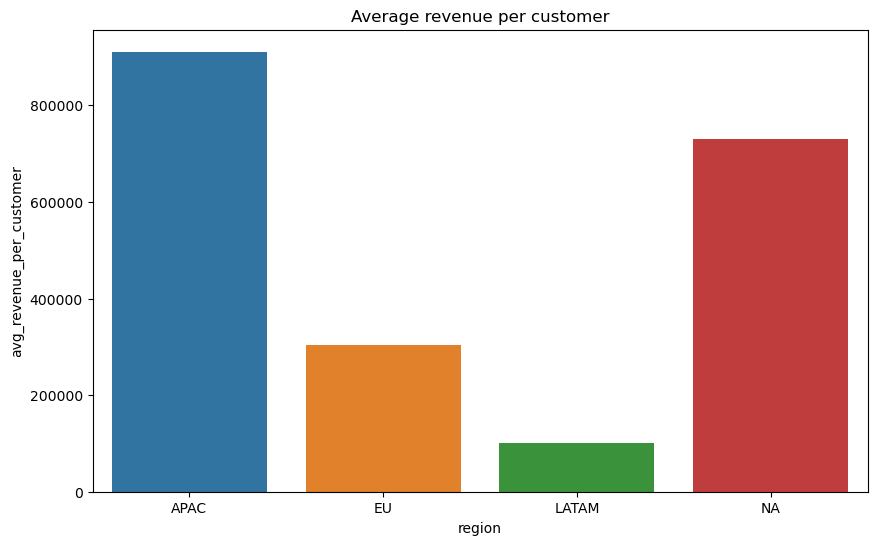

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(data = general_avg, x = 'region', y = 'avg_revenue_per_customer')
plt.title('Average revenue per customer')
plt.show()


An average customer spends the most in the APAC, and the least in LATAM. 

In [40]:
yearly_avgs = customer_df.groupby(['region','year']).agg({'customer':'nunique','revenue':'sum'}).reset_index()
yearly_avgs['avg_revenue_per_customer'] = yearly_avgs['revenue']/yearly_avgs['customer']
yearly_avgs

,region,year,customer,revenue,avg_revenue_per_customer
0,APAC,2018,28,1.624737e+06,58026.323802
1,APAC,2019,31,3.268719e+06,105442.555179
2,APAC,2020,38,5.407643e+06,142306.393276
3,APAC,2021,38,9.635285e+06,253560.134821
4,APAC,2022,38,1.467995e+07,386314.397679
5,EU,2018,25,1.306587e+05,5226.348527
6,EU,2019,37,8.693869e+05,23496.943740
7,EU,2020,44,2.008134e+06,45639.412279
8,EU,2021,44,4.177683e+06,94947.342044
9,EU,2022,44,6.174296e+06,140324.914815


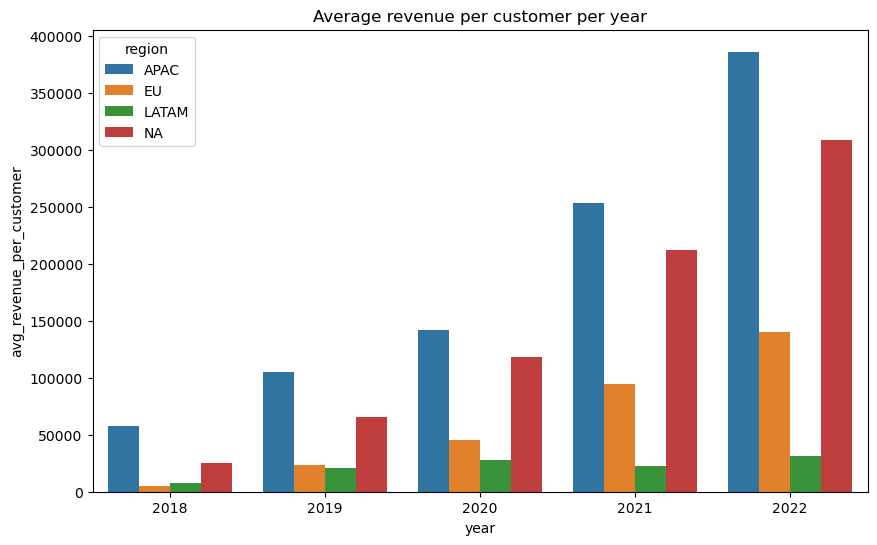

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(data = yearly_avgs, x = 'year', y = 'avg_revenue_per_customer', hue = 'region')
plt.title('Average revenue per customer per year')
plt.show()

We can see the changes in each region's average customer by year. In 2018 customers in EU and LATAM gave the lowest amount of revenue, and customers in LATAM stayed with the lowest revenue thoughout the different years (although 2022 is only 4 months, so thinks may look different when the year is done). All regions other than LATAM are steadily increasing in revenue as the years go.   

In [42]:
customer_df['month'] = customer_df['date'].dt.month
customer_df

,index,region,customer,date,product_code,sold_quantity,discount_percent,year,gross_price,disc_price,revenue,month
0,0,APAC,Acclaimed Stores,2017-09-01,A0118150101,15,0.2193,2018,14.4392,11.272683,169.090252,9
1,1,APAC,Acclaimed Stores,2017-09-01,A0118150102,16,0.2193,2018,18.5595,14.489402,231.830426,9
2,2,APAC,Acclaimed Stores,2017-09-01,A0118150103,15,0.2193,2018,19.3442,15.102017,226.530254,9
3,3,APAC,Acclaimed Stores,2017-09-01,A0118150104,13,0.2193,2018,18.5072,14.448571,187.831424,9
4,4,APAC,Acclaimed Stores,2017-09-01,A0418150101,9,0.2193,2018,14.0555,10.973129,98.758160,9
...,...,...,...,...,...,...,...,...,...,...,...,...
67240,67245,NA,walmart,2021-12-01,A0220150203,95,0.2063,2022,23.6154,18.743543,1780.636583,12
67241,67246,NA,walmart,2021-12-01,A0320150301,105,0.2063,2022,22.2856,17.688081,1857.248476,12
67242,67247,NA,walmart,2021-12-01,A0321150302,148,0.2063,2022,27.1027,21.511413,3183.689123,12
67243,67248,NA,walmart,2021-12-01,A0321150303,287,0.2063,2022,28.0059,22.228283,6379.517172,12


In [43]:
monthly_avg = customer_df[customer_df['year']!=2022].groupby(['region','month']).agg({'customer':'nunique','revenue':'sum'}).reset_index()
monthly_avg['avg_revenue_per_customer'] = monthly_avg['revenue']/monthly_avg['customer']
monthly_avg['avg_revenue_per_customer'].describe()

count       48.000000
mean     29428.426240
std      22510.207852
min       4063.649552
25%       9711.855080
50%      28075.359792
75%      44348.431008
max      96477.136001
Name: avg_revenue_per_customer, dtype: float64

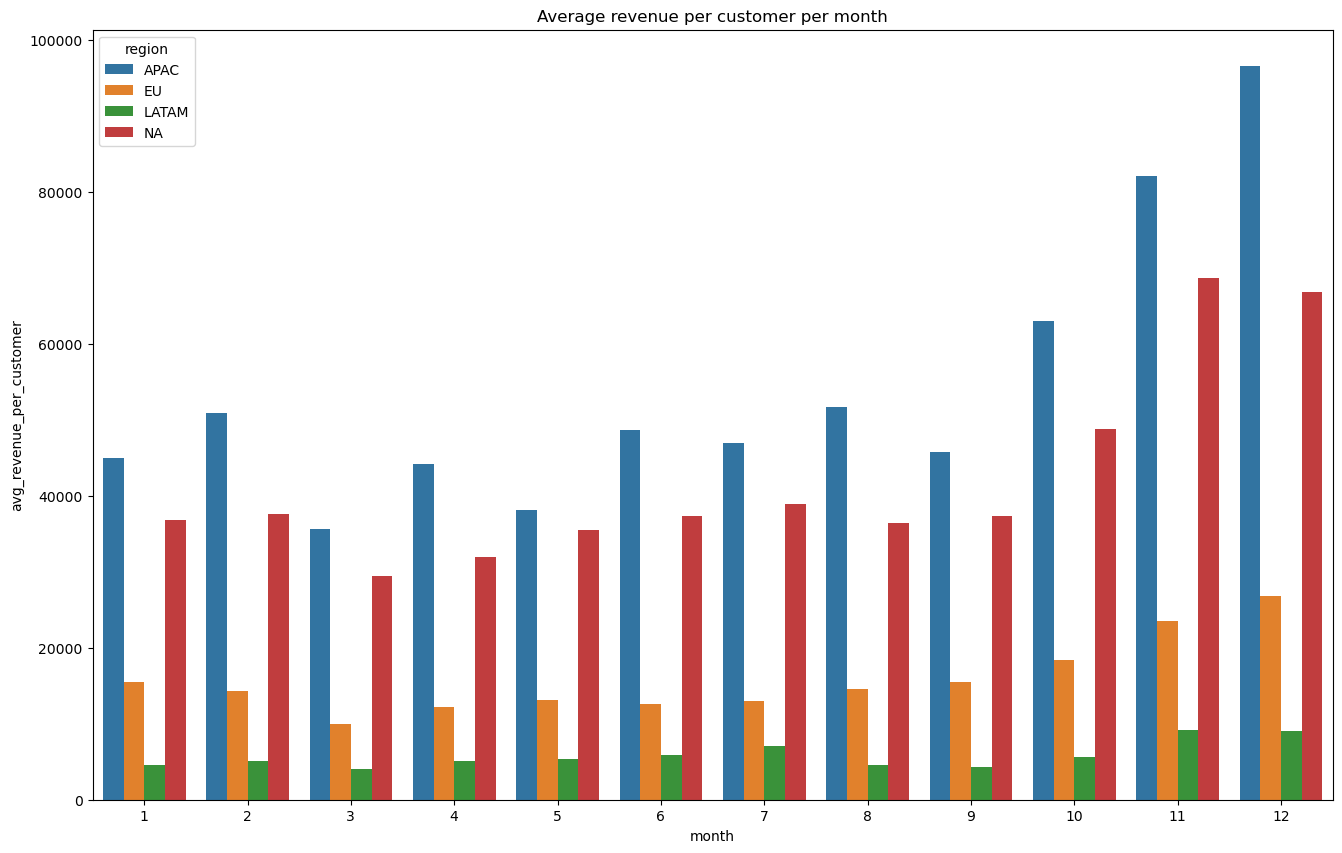

In [44]:
plt.figure(figsize=(16,10))
sns.barplot(data = monthly_avg, x = 'month', y = 'avg_revenue_per_customer', hue = 'region')
plt.title('Average revenue per customer per month')
plt.show()

As with previous average monthly analysis, I excluded the data from 2022 as it has extreme values and it flattens the plots. It seems that the highest revenue in APAC is December, while in NA it's November. This might be related to holiday season in these regions. There's an increase in EU at that time as well, but it's not as high as in APAC and NA. The average customer in LATAM yeilds the least revenue in all months of the year. The lowesr average month is March.   

## Categories

In [45]:
query = '''
SELECT 
    dim_customer.region as region,
    fact_sales_monthly.date as date,
    dim_product.category as category,
    fact_sales_monthly.product_code as product_code,
    fact_sales_monthly.sold_quantity as sold_quantity,
    fact_pre_discount.pre_invoice_discount_pct as discount_percent,
    fact_sales_monthly.fiscal_year as year,
    fact_gross_price.gross_price as gross_price   
FROM fact_sales_monthly
    INNER JOIN dim_customer on dim_customer.customer_code = fact_sales_monthly.customer_code
    INNER JOIN fact_gross_price on fact_gross_price.product_code = fact_sales_monthly.product_code 
    INNER JOIN fact_pre_discount on fact_sales_monthly.customer_code = fact_pre_discount.customer_code
    INNER JOIN dim_product on dim_product.product_code = fact_sales_monthly.product_code
GROUP BY region, fact_sales_monthly.customer_code, date, fact_sales_monthly.product_code
'''


In [46]:
category_df = pd.read_sql_query(query, con)
category_df

,region,date,category,product_code,sold_quantity,discount_percent,year,gross_price
0,APAC,2017-09-01,Internal HDD,A0118150101,51,0.0703,2018,14.4392
1,APAC,2017-09-01,Internal HDD,A0118150102,77,0.0703,2018,18.5595
2,APAC,2017-09-01,Internal HDD,A0118150103,54,0.0703,2018,19.3442
3,APAC,2017-09-01,Internal HDD,A0118150104,42,0.0703,2018,18.5072
4,APAC,2017-09-01,Graphic Card,A0418150101,67,0.0703,2018,14.0555
...,...,...,...,...,...,...,...,...
67245,NA,2021-12-01,Internal HDD,A0220150203,429,0.1923,2022,23.6154
67246,NA,2021-12-01,Internal HDD,A0320150301,546,0.1923,2022,22.2856
67247,NA,2021-12-01,Internal HDD,A0321150302,294,0.1923,2022,27.1027
67248,NA,2021-12-01,Internal HDD,A0321150303,233,0.1923,2022,28.0059


In [47]:
category_df['disc_price'] = (1 - category_df['discount_percent'])*(category_df['gross_price'])
category_df['revenue'] = category_df['sold_quantity'] * category_df['disc_price']
category_df

,region,date,category,product_code,sold_quantity,discount_percent,year,gross_price,disc_price,revenue
0,APAC,2017-09-01,Internal HDD,A0118150101,51,0.0703,2018,14.4392,13.424124,684.630336
1,APAC,2017-09-01,Internal HDD,A0118150102,77,0.0703,2018,18.5595,17.254767,1328.617071
2,APAC,2017-09-01,Internal HDD,A0118150103,54,0.0703,2018,19.3442,17.984303,971.152348
3,APAC,2017-09-01,Internal HDD,A0118150104,42,0.0703,2018,18.5072,17.206144,722.658041
4,APAC,2017-09-01,Graphic Card,A0418150101,67,0.0703,2018,14.0555,13.067398,875.515689
...,...,...,...,...,...,...,...,...,...,...
67245,NA,2021-12-01,Internal HDD,A0220150203,429,0.1923,2022,23.6154,19.074159,8182.814031
67246,NA,2021-12-01,Internal HDD,A0320150301,546,0.1923,2022,22.2856,18.000079,9828.043200
67247,NA,2021-12-01,Internal HDD,A0321150302,294,0.1923,2022,27.1027,21.890851,6435.910132
67248,NA,2021-12-01,Internal HDD,A0321150303,233,0.1923,2022,28.0059,22.620365,5270.545145


In [48]:
display(category_df.duplicated().sum())
display(category_df[category_df.duplicated()==True])

120

,region,date,category,product_code,sold_quantity,discount_percent,year,gross_price,disc_price,revenue
5195,APAC,2020-03-01,Internal HDD,A0118150104,2,0.0552,2020,18.5072,17.485603,34.971205
5200,APAC,2020-03-01,Graphic Card,A0418150102,2,0.0552,2020,15.9880,15.105462,30.210925
5213,APAC,2020-05-01,Internal HDD,A0118150102,4,0.0552,2020,18.5595,17.535016,70.140062
5231,APAC,2020-07-01,Graphic Card,A0418150101,10,0.0552,2020,14.0555,13.279636,132.796364
5250,APAC,2020-09-01,Internal HDD,A0219150202,24,0.0552,2021,20.8223,19.672909,472.149817
...,...,...,...,...,...,...,...,...,...,...
52623,EU,2020-05-01,Internal HDD,A0118150103,2,0.1877,2020,19.3442,15.713294,31.426587
52630,EU,2020-05-01,Graphic Card,A0418150102,3,0.1877,2020,15.9880,12.987052,38.961157
52645,EU,2020-08-01,Internal HDD,A0118150103,13,0.1877,2020,19.3442,15.713294,204.272818
52653,EU,2020-08-01,Graphic Card,A0418150103,5,0.1877,2020,15.9345,12.943594,64.717972


In [49]:
category_df = category_df.drop_duplicates()
category_df

,region,date,category,product_code,sold_quantity,discount_percent,year,gross_price,disc_price,revenue
0,APAC,2017-09-01,Internal HDD,A0118150101,51,0.0703,2018,14.4392,13.424124,684.630336
1,APAC,2017-09-01,Internal HDD,A0118150102,77,0.0703,2018,18.5595,17.254767,1328.617071
2,APAC,2017-09-01,Internal HDD,A0118150103,54,0.0703,2018,19.3442,17.984303,971.152348
3,APAC,2017-09-01,Internal HDD,A0118150104,42,0.0703,2018,18.5072,17.206144,722.658041
4,APAC,2017-09-01,Graphic Card,A0418150101,67,0.0703,2018,14.0555,13.067398,875.515689
...,...,...,...,...,...,...,...,...,...,...
67245,NA,2021-12-01,Internal HDD,A0220150203,429,0.1923,2022,23.6154,19.074159,8182.814031
67246,NA,2021-12-01,Internal HDD,A0320150301,546,0.1923,2022,22.2856,18.000079,9828.043200
67247,NA,2021-12-01,Internal HDD,A0321150302,294,0.1923,2022,27.1027,21.890851,6435.910132
67248,NA,2021-12-01,Internal HDD,A0321150303,233,0.1923,2022,28.0059,22.620365,5270.545145


In [50]:
category = category_df.groupby(['region','category'])['revenue'].sum().reset_index()
category

,region,category,revenue
0,APAC,Graphic Card,4.960321e+06
1,APAC,Internal HDD,2.965590e+07
2,EU,Graphic Card,1.568541e+06
3,EU,Internal HDD,1.177786e+07
4,LATAM,Graphic Card,4.914422e+04
5,LATAM,Internal HDD,2.535881e+05
6,NA,Graphic Card,1.723154e+06
7,NA,Internal HDD,1.141005e+07


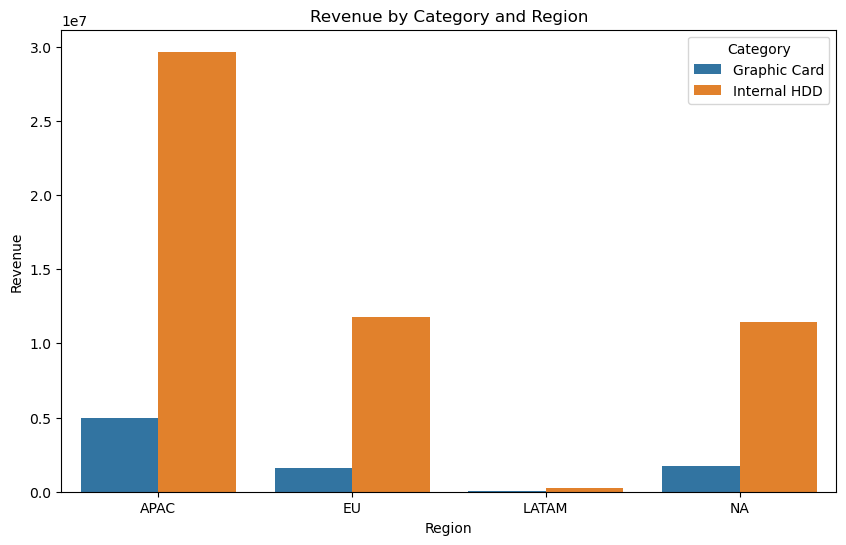

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(data=category, x='region', y='revenue', hue='category')
plt.title('Revenue by Category and Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.legend(title='Category')
plt.show()

In our dataset only 2 categories are sold. Either Internal HDD or graphic cards. Internal HDD have much more revenue than graphic cards across all of the different regions. There's no point in checking it statistically. 

## Statistical test
### in this part I will check whether customers in NA tend to buy more or less products per purchase when they buy via B & M vs. via E commerce.

In [52]:
query = '''
SELECT 
    dim_customer.region as region,
    fact_sales_monthly.date as date,
    dim_customer.platform as platform,
    fact_sales_monthly.product_code as product_code,
    fact_sales_monthly.sold_quantity as sold_quantity,
    fact_pre_discount.pre_invoice_discount_pct as discount_percent,
    fact_sales_monthly.fiscal_year as year,
    fact_gross_price.gross_price as gross_price   
FROM fact_sales_monthly
    INNER JOIN dim_customer on dim_customer.customer_code = fact_sales_monthly.customer_code
    INNER JOIN fact_gross_price on fact_gross_price.product_code = fact_sales_monthly.product_code 
    INNER JOIN fact_pre_discount on fact_sales_monthly.customer_code = fact_pre_discount.customer_code
    INNER JOIN dim_product on dim_product.product_code = fact_sales_monthly.product_code
GROUP BY region, fact_sales_monthly.customer_code, date, fact_sales_monthly.product_code
'''

In [53]:
stat_df = pd.read_sql_query(query, con)
stat_df

,region,date,platform,product_code,sold_quantity,discount_percent,year,gross_price
0,APAC,2017-09-01,Brick & Mortar,A0118150101,51,0.0703,2018,14.4392
1,APAC,2017-09-01,Brick & Mortar,A0118150102,77,0.0703,2018,18.5595
2,APAC,2017-09-01,Brick & Mortar,A0118150103,54,0.0703,2018,19.3442
3,APAC,2017-09-01,Brick & Mortar,A0118150104,42,0.0703,2018,18.5072
4,APAC,2017-09-01,Brick & Mortar,A0418150101,67,0.0703,2018,14.0555
...,...,...,...,...,...,...,...,...
67245,NA,2021-12-01,E-Commerce,A0220150203,429,0.1923,2022,23.6154
67246,NA,2021-12-01,E-Commerce,A0320150301,546,0.1923,2022,22.2856
67247,NA,2021-12-01,E-Commerce,A0321150302,294,0.1923,2022,27.1027
67248,NA,2021-12-01,E-Commerce,A0321150303,233,0.1923,2022,28.0059


In [54]:
stat_df['disc_price'] = (1 - stat_df['discount_percent'])*(stat_df['gross_price'])
stat_df['revenue'] = stat_df['sold_quantity'] * stat_df['disc_price']
stat_df

,region,date,platform,product_code,sold_quantity,discount_percent,year,gross_price,disc_price,revenue
0,APAC,2017-09-01,Brick & Mortar,A0118150101,51,0.0703,2018,14.4392,13.424124,684.630336
1,APAC,2017-09-01,Brick & Mortar,A0118150102,77,0.0703,2018,18.5595,17.254767,1328.617071
2,APAC,2017-09-01,Brick & Mortar,A0118150103,54,0.0703,2018,19.3442,17.984303,971.152348
3,APAC,2017-09-01,Brick & Mortar,A0118150104,42,0.0703,2018,18.5072,17.206144,722.658041
4,APAC,2017-09-01,Brick & Mortar,A0418150101,67,0.0703,2018,14.0555,13.067398,875.515689
...,...,...,...,...,...,...,...,...,...,...
67245,NA,2021-12-01,E-Commerce,A0220150203,429,0.1923,2022,23.6154,19.074159,8182.814031
67246,NA,2021-12-01,E-Commerce,A0320150301,546,0.1923,2022,22.2856,18.000079,9828.043200
67247,NA,2021-12-01,E-Commerce,A0321150302,294,0.1923,2022,27.1027,21.890851,6435.910132
67248,NA,2021-12-01,E-Commerce,A0321150303,233,0.1923,2022,28.0059,22.620365,5270.545145


In [55]:
stat_df[stat_df['sold_quantity']== 0]

,region,date,platform,product_code,sold_quantity,discount_percent,year,gross_price,disc_price,revenue
24449,EU,2017-09-01,Brick & Mortar,A0118150101,0,0.0584,2018,14.4392,13.595951,0.0
24450,EU,2017-09-01,Brick & Mortar,A0118150102,0,0.0584,2018,18.5595,17.475625,0.0
24451,EU,2017-09-01,Brick & Mortar,A0118150103,0,0.0584,2018,19.3442,18.214499,0.0
24452,EU,2017-09-01,Brick & Mortar,A0118150104,0,0.0584,2018,18.5072,17.426380,0.0
24453,EU,2017-09-01,Brick & Mortar,A0418150101,0,0.0584,2018,14.0555,13.234659,0.0
...,...,...,...,...,...,...,...,...,...,...
34611,EU,2017-09-01,E-Commerce,A0118150104,0,0.2048,2018,18.5072,14.716925,0.0
34612,EU,2017-09-01,E-Commerce,A0418150101,0,0.2048,2018,14.0555,11.176934,0.0
34613,EU,2017-09-01,E-Commerce,A0418150102,0,0.2048,2018,15.9880,12.713658,0.0
34614,EU,2017-09-01,E-Commerce,A0418150103,0,0.2048,2018,15.9345,12.671114,0.0


Since I'm checking for revenue I only want to have products thay were sold.

In [56]:
stat_df = stat_df[stat_df['sold_quantity']> 0]

In [57]:
stat_df[stat_df['sold_quantity']== 0].sum()

region                0
date                  0
platform              0
product_code          0
sold_quantity         0
discount_percent    0.0
year                  0
gross_price         0.0
disc_price          0.0
revenue             0.0
dtype: object

In [58]:
stat_df.duplicated().sum()

67

In [59]:
stat_df = stat_df.drop_duplicates() 

In [60]:
stat_df

,region,date,platform,product_code,sold_quantity,discount_percent,year,gross_price,disc_price,revenue
0,APAC,2017-09-01,Brick & Mortar,A0118150101,51,0.0703,2018,14.4392,13.424124,684.630336
1,APAC,2017-09-01,Brick & Mortar,A0118150102,77,0.0703,2018,18.5595,17.254767,1328.617071
2,APAC,2017-09-01,Brick & Mortar,A0118150103,54,0.0703,2018,19.3442,17.984303,971.152348
3,APAC,2017-09-01,Brick & Mortar,A0118150104,42,0.0703,2018,18.5072,17.206144,722.658041
4,APAC,2017-09-01,Brick & Mortar,A0418150101,67,0.0703,2018,14.0555,13.067398,875.515689
...,...,...,...,...,...,...,...,...,...,...
67245,NA,2021-12-01,E-Commerce,A0220150203,429,0.1923,2022,23.6154,19.074159,8182.814031
67246,NA,2021-12-01,E-Commerce,A0320150301,546,0.1923,2022,22.2856,18.000079,9828.043200
67247,NA,2021-12-01,E-Commerce,A0321150302,294,0.1923,2022,27.1027,21.890851,6435.910132
67248,NA,2021-12-01,E-Commerce,A0321150303,233,0.1923,2022,28.0059,22.620365,5270.545145


In [61]:
bnm = stat_df[(stat_df['platform'] == 'Brick & Mortar') & (stat_df['region'] == 'NA')]
ecom = stat_df[(stat_df['platform'] == 'E-Commerce') & (stat_df['region'] == 'NA')]
display(bnm.info())
print(ecom.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6925 entries, 57244 to 66864
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            6925 non-null   object 
 1   date              6925 non-null   object 
 2   platform          6925 non-null   object 
 3   product_code      6925 non-null   object 
 4   sold_quantity     6925 non-null   int64  
 5   discount_percent  6925 non-null   float64
 6   year              6925 non-null   int64  
 7   gross_price       6925 non-null   float64
 8   disc_price        6925 non-null   float64
 9   revenue           6925 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 595.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 3081 entries, 57629 to 67249
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            3081 non-null   object 
 1   date              3081 non-null   object 
 2   platform          3081 non-null   object 
 3   product_code      3081 non-null   object 
 4   sold_quantity     3081 non-null   int64  
 5   discount_percent  3081 non-null   float64
 6   year              3081 non-null   int64  
 7   gross_price       3081 non-null   float64
 8   disc_price        3081 non-null   float64
 9   revenue           3081 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 264.8+ KB
None


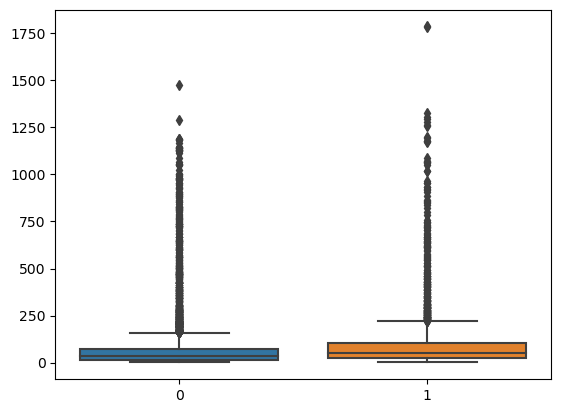

In [62]:
sns.boxplot(data = [bnm['sold_quantity'],ecom['sold_quantity']])
plt.show()

Seems like there are alot of extreme values. I'll remove extreme values to have a more accurate analysis.

In [63]:
bnm['sold_quantity'].describe()

count    6925.000000
mean       74.124477
std       134.964790
min         1.000000
25%        15.000000
50%        35.000000
75%        73.000000
max      1475.000000
Name: sold_quantity, dtype: float64

In [64]:
np.percentile(bnm['sold_quantity'],[95,99])

array([260.8 , 811.52])

In [65]:
ecom['sold_quantity']

57629     20
57630     12
57631      8
57632      7
57633      5
        ... 
67245    429
67246    546
67247    294
67248    233
67249    545
Name: sold_quantity, Length: 3081, dtype: int64

In [66]:
np.percentile(ecom['sold_quantity'],[95,99])

array([320., 861.])

In [67]:
bnm_filtered = bnm[bnm['sold_quantity']<261]
ecom_filtered = ecom[ecom['sold_quantity']<321]

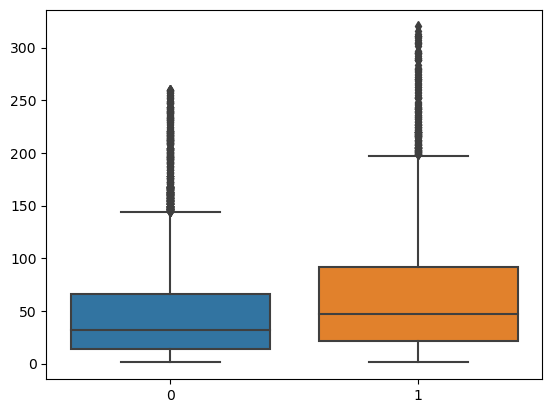

In [68]:
sns.boxplot(data = [bnm_filtered['sold_quantity'],ecom_filtered['sold_quantity']])
plt.show()

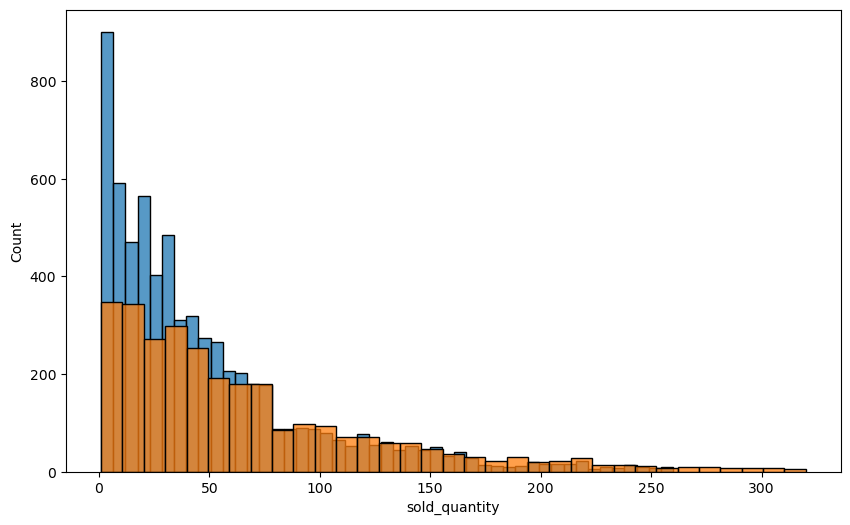

In [69]:
plt.figure(figsize = (10,6))
sns.histplot(bnm_filtered['sold_quantity'], label = 'bnm')
sns.histplot(ecom_filtered['sold_quantity'], label = 'ecom')
plt.show()

The quantity of products in an order do not distrubte normally. However, the distribution is fairly similar, aside from sample size of the two groups. I will conduct a two sided mann whitney U test to check if there is a difference in sold quantity between B&M orders vs. E commerece orders. 

In [70]:
from scipy.stats import mannwhitneyu
test = mannwhitneyu(bnm_filtered['sold_quantity'],ecom_filtered['sold_quantity'],alternative = 'less')
p_value = test[1]
if p_value < 0.05:
    print('Orders via ecommerce are statistically greater in quantity than those via B & M')
else:
    print("There's no statistical difference in quantity between purchases via e commerce and B&M")

Orders via ecommerce are statistically greater in quantity than those via B & M


Seems like NA customers buy more products per purchase on average when they buy via E commerce.   

## Summary and takeaways

### Revenue and gross profit are increasing yearly. 2022 is the highest revenue year by far, even though it only has 4 months of data

### Months October to February have the highest average revenue and profit, March to September have low revenue and profit. While October to February might include the holiday season, March to September have relatively low revenue. If marketing campigns are to be considered - they should by foucsed on these months.

### APAC is the region with highest average revenue per customer, followed by NA. EU region is steadily increasing in average revenue per customer, but still lags behind APAC and NA. The LATAM market has been steady and mostly unchanged through the years, with the lowest average revenue per customer. Perhaps it is possible to increase sales in EU and LATAM. LATAM  it has only 3 active customers. An increase in customers will probably benefit the average revenue per customer of this market. 

### Internal HDD is the highest sold category across all regions.

### Customers from NA buy in larger quantites when they buy via the E- Commerce platform
